Homework 6! 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data_dir = "/Users/katielark/Downloads/"
sdg_names = pd.read_csv(data_dir + "sdg_name_definition.csv")

text_file_name = "osdg-community-data-v2024-04-01.csv"
text_df = pd.read_csv(data_dir + text_file_name,sep = "\t",  quotechar='"')
text_df.drop(text_df.columns.values[0],axis = 1, inplace=True)
text_df = text_df.query("agreement > 0.5 and (labels_positive - labels_negative) > 2").reset_index(drop=True)
corpus = text_df.text

In [3]:
def fifty_freq(corpus, stop_word=None):
        count_vectorizer = CountVectorizer(stop_words= stop_word)
        count_vectorizer.fit(corpus)
        count_vector = count_vectorizer.transform(corpus).toarray() 
        count_vector_df = pd.DataFrame(count_vector, columns=count_vectorizer.get_feature_names_out())
        term_freq = pd.DataFrame({"term": count_vector_df.columns.values, "freq" : count_vector_df.sum(axis=0)})
        total_occurrences = term_freq['freq'].sum()
        term_freq['percent'] = (term_freq['freq'] / total_occurrences) * 100
        sort = term_freq.sort_values(by="freq", ascending=False)
        freq_50 = sort.head(50)
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x='term', y='freq', data=freq_50, palette='viridis')

        for i, row in freq_50.iterrows():
            ax.text(i, row['freq'] + 1, f"{row['percent']:.2f}%", ha='center', va='bottom', fontsize=6, rotation = 90)

        plt.xticks(rotation=90)

        plt.xlabel('Term')
        plt.ylabel('Frequency')
        plt.title('Word Frequencies')
        plt.show()
        return freq_50

/var/folders/00/yzv7lrx12xq5_g14dw7m_2180000gn/T/ipykernel_75818/1975933787.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='term', y='freq', data=freq_50, palette='viridis')


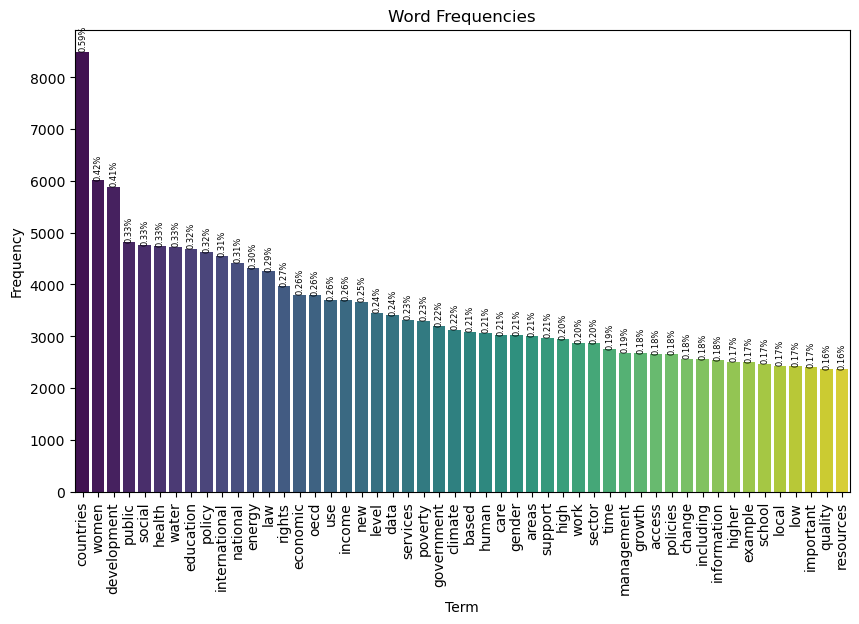

In [4]:
top50 = fifty_freq(corpus, stop_word='english')

In [5]:
CountVectorizer(stop_words= 'english').get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [6]:
top50_term = top50.term.to_list()
top50_term

['countries',
 'women',
 'development',
 'public',
 'social',
 'health',
 'water',
 'education',
 'policy',
 'international',
 'national',
 'energy',
 'law',
 'rights',
 'economic',
 'oecd',
 'use',
 'income',
 'new',
 'level',
 'data',
 'services',
 'poverty',
 'government',
 'climate',
 'based',
 'human',
 'care',
 'gender',
 'areas',
 'support',
 'high',
 'work',
 'sector',
 'time',
 'management',
 'growth',
 'access',
 'policies',
 'change',
 'including',
 'information',
 'higher',
 'example',
 'school',
 'local',
 'low',
 'important',
 'quality',
 'resources']

/var/folders/00/yzv7lrx12xq5_g14dw7m_2180000gn/T/ipykernel_75818/1975933787.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='term', y='freq', data=freq_50, palette='viridis')


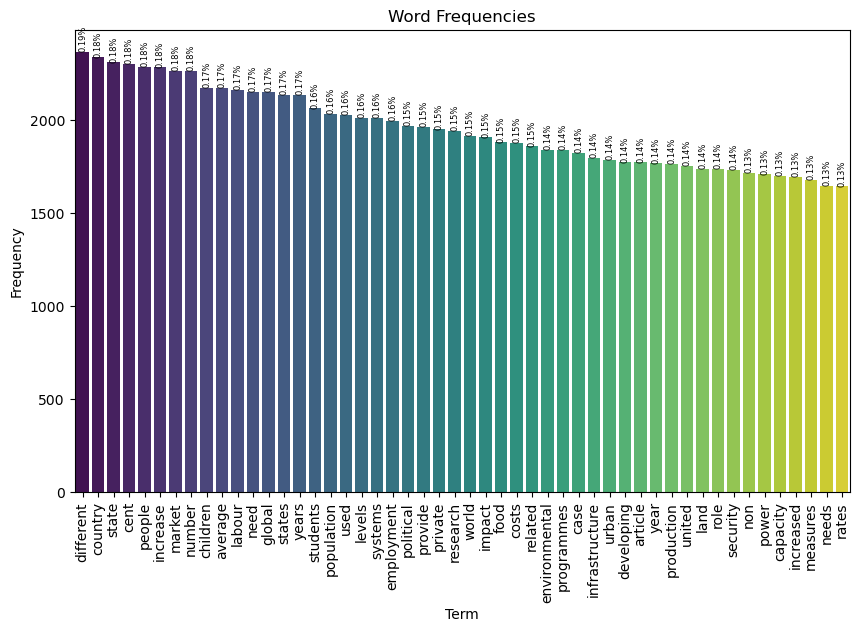

In [7]:
my_stop_word = top50.term.to_list() + list(CountVectorizer(stop_words= 'english').get_stop_words())
next50 = fifty_freq(corpus, stop_word=my_stop_word)

/var/folders/00/yzv7lrx12xq5_g14dw7m_2180000gn/T/ipykernel_75818/1975933787.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='term', y='freq', data=freq_50, palette='viridis')


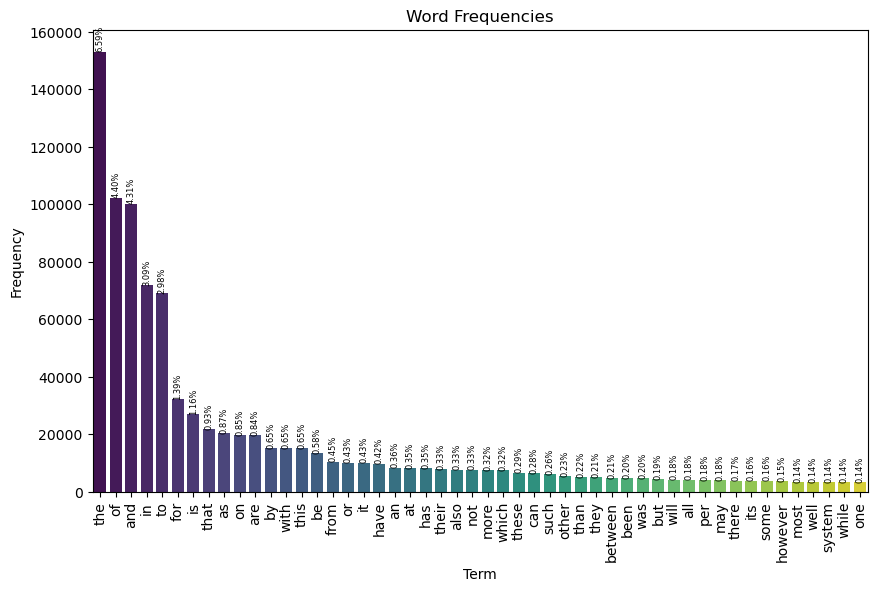

In [9]:
my_stop_word = top50.term.to_list()
next50 = fifty_freq(corpus, stop_word=my_stop_word)

In [ ]:
my_stop_word = top50.term.to_list()
next50 = fifty_freq(corpus, stop_word=my_stop_word)